# Evaluación Solemne 1
## "_Pronóstico del Clima en Australia_"

###  - Asignatura : Minería de Datos.
####  - Sección : MDY001D.
####  - Docente : Luis Díaz.

#### _Integrantes :_
- _Joaquín Reyes._
- _Jorge Quintui._
- _José López._

### EDA para Pronóstico del Clima
#### - Parte 1: Análisis exploratorio de datos (EDA)
- 1) Análisis de las características.
- 2) Encontrar cualquier relación o tendencia considerando múltiples características.

#### - Parte 2: Ingeniería de características y limpieza de datos:
- 1) Agregar algunas características.
- 2) Eliminación de funciones redundantes.
- 3) Convertir características en forma adecuada para modelar.

## Acerca de los datos
- Date: Fecha de la observación
- Location: El nombre común de la ubicación de la estación meteorológica.
- MinTemp: La temperatura mínima en grados centígrados.
- MaxTemp: La temperatura máxima en grados centígrados.
- Rainfall: La cantidad de lluvia registrada para el día en mm.
- Evaporation: Evaporación de la bandeja de clase A (mm) en las 24 horas a las 9 a.
- Sunshine: Cantidad de horas de sol brillante en el día.
- WindGustDir: Dirección de la ráfaga de viento más fuerte en 24 horas hasta la medianoche
- WindGustSpeed: Velocidad (km / h) de la ráfaga de viento más fuerte en 24 horas hasta la medianoche
- WindDir9am: Dirección del viento a las 9 am.
- WindDir3pm: Dirección del viento a las 15 pm.
- WindSpeed9am: Velocidad (km / h) del viento a las 9am.
- WindSpeed3pm: Velocidad (km / h) del viento a las 15pm.
- Humidity9am: Humedad (g/m3) del aire a las 9am. (g/m3 = gramos de agua por cada metro cúbico de 
  aire)
- Humidity3pm: Humedad (g/m3) del aire a las 15pm. (g/m3 = gramos de agua por cada metro cúbico de 
  aire)
- Pressure9am: Presión (pascales) del aire a las 9am. 
- Pressure15pm: Presión (pascales) del aire a las 15pm. 
- Cloud9am: Nubosidad (octas) del cielo a las 9am. (octas, a la parte de la bóveda celeste cubierta de nubes, 
  hasta un máximo de 8 para el cielo cubierto o entoldado.)
- Cloud15pm: Nubosidad (octas) del cielo a las 15pm. 
- Temp9am: Temperatura (C) a las 9am. 
- Temp15pm: Temperatura (C) a las 15pm. 
- RainToday: Si llueve más de 1mm en el día de la muestra 
- RainTomorrow: predicción si lloverá más de 1 mm mañana

In [415]:
# Importación de las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Análisis Exploratorio de Datos

### 1.1 Carga de Datos

In [34]:
url_train = './dataset/weatherAUS.csv'
df = pd.read_csv(url_train,sep=',')

In [35]:
# Primeros 5 registros
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [36]:
# Últimos 5 registros
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [37]:
# Muestra un registro al azar
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
102663,2016-08-14,Nuriootpa,1.2,14.5,0.0,1.6,6.9,SW,17.0,NE,...,57.0,1030.9,1028.4,2.0,NaN,8.6,13.1,No,0.0,No


In [38]:
# Vista general 
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


### 1.2 Tamaño del Dataset

In [39]:
df.shape

(142193, 24)

### 1.3 Tipos de datos

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [41]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

### 1.4 Valores Nulos

In [42]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [43]:
for x in df.columns:
    print('La cantidad de nulos de la columna', x, ' Es de ', df[x].isna().sum())

La cantidad de nulos de la columna Date  Es de  0
La cantidad de nulos de la columna Location  Es de  0
La cantidad de nulos de la columna MinTemp  Es de  637
La cantidad de nulos de la columna MaxTemp  Es de  322
La cantidad de nulos de la columna Rainfall  Es de  1406
La cantidad de nulos de la columna Evaporation  Es de  60843
La cantidad de nulos de la columna Sunshine  Es de  67816
La cantidad de nulos de la columna WindGustDir  Es de  9330
La cantidad de nulos de la columna WindGustSpeed  Es de  9270
La cantidad de nulos de la columna WindDir9am  Es de  10013
La cantidad de nulos de la columna WindDir3pm  Es de  3778
La cantidad de nulos de la columna WindSpeed9am  Es de  1348
La cantidad de nulos de la columna WindSpeed3pm  Es de  2630
La cantidad de nulos de la columna Humidity9am  Es de  1774
La cantidad de nulos de la columna Humidity3pm  Es de  3610
La cantidad de nulos de la columna Pressure9am  Es de  14014
La cantidad de nulos de la columna Pressure3pm  Es de  13981
La ca

### 1.5 Características y Observaciones

In [44]:
for x in df.columns:
 print('El nombre de la característica es :',x)

El nombre de la característica es : Date
El nombre de la característica es : Location
El nombre de la característica es : MinTemp
El nombre de la característica es : MaxTemp
El nombre de la característica es : Rainfall
El nombre de la característica es : Evaporation
El nombre de la característica es : Sunshine
El nombre de la característica es : WindGustDir
El nombre de la característica es : WindGustSpeed
El nombre de la característica es : WindDir9am
El nombre de la característica es : WindDir3pm
El nombre de la característica es : WindSpeed9am
El nombre de la característica es : WindSpeed3pm
El nombre de la característica es : Humidity9am
El nombre de la característica es : Humidity3pm
El nombre de la característica es : Pressure9am
El nombre de la característica es : Pressure3pm
El nombre de la característica es : Cloud9am
El nombre de la característica es : Cloud3pm
El nombre de la característica es : Temp9am
El nombre de la característica es : Temp3pm
El nombre de la característi

In [45]:
# ¿Qué columnas tienen los datos?
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [46]:
# Cantidad de características
df.shape[1]


24

In [47]:
# Cantidad de observaciones
df.shape[0]

142193

In [48]:
# Cantidad de Características con datos Cualitativos / Categóricos 

 # Agrupación de las columnas por tipo de datos
tipos = df.columns.to_series().groupby(df.dtypes).groups

ctext = tipos[np.dtype('object')]
len(ctext)

7

In [49]:
# Cantidad de características con datos Cuantitativos / Númericos

columnas = df.columns
cnum = list(set(columnas) - set(ctext))
len(cnum)

17

### 1.6 Medidas Estadísticas Básicas

In [50]:
# Cómo se distribuyen las variables númericas
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [51]:
# Cómo se comportan las variables categóricas
df.describe(include = 'object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-12-23,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [52]:
# Varibales cuantitativas y cualitativas.
df.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2013-12-23,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


### 2. Preprocesamiento de los datos
- Convertir algunas variables continuas en rangos.
- Convertir valores String en valores númericos.
- Eliminar características innecesarias.
- Corregir valores nulos.

Variables Relevantes :
- Date
- RainTomorrow
- RainToday
- Location
- MinTemp          
- MaxTemp          
- Pressure9am      
- Temp3pm          
- Rainfall         
- Humidity9am      
- WindSpeed9am     



#### 2.1 Creamos un respaldo del DataFrame

In [53]:
# Respaldo para limpieza y Transformación
df2 = df

In [54]:
df2.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

#### 2.2 Transformación De Datos Nulos  
- Se puede contactar con la persona que recopiló los datos, si puede entregarnos los datos faltantes.
- Se puede eliminar los registros con datos faltantes.
- Se pueden reemplazar los datos calculando el valor promedio de la variable completa.
- Se pueden dejar los datos faltantes como están.


### Decisión
- **No** es factible eliminar los registros nulos, se pierden muchos datos.
- **No** se pueden solicitar los datos faltantes.

#### Al ser muchos los datos pérdidos podemos dejarlos como están o bien imputarlos por el promedio de la variable completa. 

### 1. Para las variables cuantitativas :
#### Debido a que no queremos sesgar el modelo de entrenamiento, vamos a evaluar el coeficiente de variación.
#### Sólo si la media aritmética es representativa se usará el valor promedio, de lo contrario se reemplazará por 0.
- Si el coefiente de variación tiende a 0 consideraremos el promedio como reemplazo.
- Si el coeficiente de variación tiende a 1 **NO** consideraremos el promedio como reemplazo.

### 2. Para la variables Cualitativas :
#### Se reemplazará el valor por la moda debido a que no son demasiados datos en comparación a las variables cuantitativas.

In [55]:
# Función que calcula de un conjunto de datos la desviación estándar
# {param} conjunto list
# {return} double

def calcularDesviacionStandar(conjunto):
    print("Desviación stándar : ", np.std(conjunto))
    return np.std(conjunto)

# Función que calcula el coeficiente de variación de un conjunto de datos
# {param} devest double 
# {param} mean double
# {return} double
def calcularCoeficienteVariacion(devest, mean):
    print("Coeficiente de variación : ", devest/mean)
    return devest/mean

In [56]:
# Completando valores faltantes datos cuantititavos
for columna in cnum:
    mean = round(df2[columna].mean(),1)
    devest = calcularDesviacionStandar(df2[columna])
    cv = calcularCoeficienteVariacion(devest,mean)
    # Evaluamos si es representativo el promedio
    if cv < 0.5 :
        # Coeficiente de variación que tiende a 0.
        # Reemplazamos el valor NULL por el promedio debido a que es representativo.
        df2[columna] = df2[columna].fillna(mean)    
    else :
        # Coefiente de variación que tiende a 1.
        # Reemplazamos el valor NULL por un 0 debido a que el promedio no es representativo, los datos están muy dispersos.
        df2[columna] = df2[columna].fillna(0) 

Desviación stándar :  7.036649341871445
Coeficiente de variación :  0.00693061099366832
Desviación stándar :  3.781499572795838
Coeficiente de variación :  0.4975657332626103
Desviación stándar :  20.79769680632284
Coeficiente de variación :  0.40383877293830756
Desviación stándar :  8.803313497214425
Coeficiente de variación :  0.4732964245814207
Desviación stándar :  6.937568996677638
Coeficiente de variación :  0.3197036403998912
Desviación stándar :  13.588749650081386
Coeficiente de variación :  0.33971874125203466
Desviación stándar :  8.893305526815979
Coeficiente de variación :  0.6352361090582842
Desviación stándar :  7.105447994462787
Coeficiente de variación :  0.006981868914673073
Desviación stándar :  6.403260057141954
Coeficiente de variación :  0.524857381732947
Desviación stándar :  4.188510764891587
Coeficiente de variación :  0.7615474117984704
Desviación stándar :  6.492815348283867
Coeficiente de variación :  0.3819303146049333
Desviación stándar :  8.47793925768996

In [57]:
#Completando valores faltantes datos categóricos
for columna in ctext:
    # Buscamos la moda en los valores categóricos del dataframe
    mode = df2[columna].mode()[0]
    print("Moda :",mode, " de la característica " , columna)
    df2[columna] = df2[columna].fillna(mode)

Moda : 2013-03-02  de la característica  Date
Moda : Canberra  de la característica  Location
Moda : W  de la característica  WindGustDir
Moda : N  de la característica  WindDir9am
Moda : SE  de la característica  WindDir3pm
Moda : No  de la característica  RainToday
Moda : No  de la característica  RainTomorrow


In [58]:
 # Corroboramos si hay nulos en el dataframe
if(df2.isnull().any().any()):
    print('Hay valores nulos.')
else: 
    print('No hay valores nulos.')


No hay valores nulos.


In [59]:
df2.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

#### 2.2 Limpieza y Transformación De Datos

- Variables Categóricas a números

In [60]:
# Variable Categórica RainTomorrow
# Reemplazamos los datos a números con la función dummies de pandas
# Sólo consideramos 1 columna
df2 = pd.get_dummies(df2,columns = ['RainTomorrow'], drop_first = True)
df2.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow_Yes
103841,2011-06-20,Woomera,6.2,21.0,0.0,2.2,8.4,WNW,63.0,NNW,...,38.0,1016.5,1011.6,1.0,1.0,10.1,20.3,No,0.4,0


In [61]:
# Variable Categórica RainToday
# Reemplazamos los datos a números con la función dummies de pandas
# Sólo consideramos 1 columna
df2 = pd.get_dummies(df2,columns = ['RainToday'], drop_first = True)
df2.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow_Yes,RainToday_Yes
81295,2016-05-22,Dartmoor,11.9,18.7,0.2,0.0,7.6,NNE,46.0,NNE,...,68.0,1011.3,1007.7,0.0,0.0,14.5,17.8,13.2,1,0


In [62]:
# Variable Categórica Date
# Parseamos la variable de la fecha a datetime para utilizar sus propiedades
# Establecemos como indíce del dataframe porque es el identificador de los días
df2['Date'] = pd.to_datetime(df2.Date)
df2.set_index('Date',inplace = True)

In [63]:
# Importamos la librería LabelEncoder de sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Creamos una instancia de labelEncoder
le = LabelEncoder()

In [64]:
# Variable Categórica location

# Convertimos el dataframe a un numpy.ndarray
x = df2.iloc[:,:].values

print(type(x))

# Buscamos los valores únicos de la columna Location
pd.DataFrame(x)[0].unique()

<class 'numpy.ndarray'>


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [65]:
# Transformar las estaciones
df2['Location_encoder'] = le.fit_transform(df2.Location.values)
df2.tail(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow_Yes,RainToday_Yes,Location_encoder
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-22,Uluru,3.6,25.3,0.0,0.0,7.6,NNW,22.0,SE,N,...,1023.5,1019.1,0.0,0.0,10.9,24.5,0.0,0,0,41
2017-06-23,Uluru,5.4,26.9,0.0,0.0,7.6,N,37.0,SE,WNW,...,1021.0,1016.8,0.0,0.0,12.5,26.1,0.0,0,0,41
2017-06-24,Uluru,7.8,27.0,0.0,0.0,7.6,SE,28.0,SSE,N,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0,0,41


In [66]:
# Obtenemos los valores de las estaciones y su codificación
location = le.inverse_transform(df2.Location_encoder.values)
locationEncoder = df2.Location_encoder.values

# Parseamos los arreglos a listas
listaClave = np.unique(locationEncoder).tolist()
listaValor = np.unique(location).tolist()

# Imprimimos la clave y valor de cada Estación codificada
diccionarioLocation = []
for i in range(len(listaClave)):
    diccionario = {'Clave':i,'Valor': listaValor[i]}
    diccionarioLocation.append(diccionario)

data = pd.DataFrame(diccionarioLocation)
data.set_index('Clave',inplace = True)

data


,Valor
Clave,
0,Adelaide
1,Albany
2,Albury
3,AliceSprings
4,BadgerysCreek
5,Ballarat
6,Bendigo
7,Brisbane
8,Cairns


- Variables Continúas en rangos

In [67]:
# Importamos la librería Math
import math

In [68]:
# Creamos funciones para agrupar datos en intervalos

# Función que calcula el total de datos, valor minimo, máximo, n° Intervalos y amplitud de intervalo
# {param} dataFrame dataFrame pandas.core.frame.DataFrame
# {param} caracteristica string
# {return} list

def calculosBasicos(dataFrame, caracteristica):
    
    # 1. Calculamos el total de datos
    total = dataFrame[caracteristica].count()
    print('Total de observaciones : ', total)

    # 2. Cálculamos el valor mínimo
    valor_max = dataFrame[caracteristica].max()
    print("Máxima : " , valor_max)

    # 3. Cálculamos el valor máximo
    valor_min = dataFrame[caracteristica].min()
    print("Mínima : " , valor_min)

    # 4. Cálculamos los intervalos con la regla de Sturges
    n_intervalos = round(1 + 3.322 * math.log(total,10))
    print("Número de intervalos : " , n_intervalos)

    # 5. Cálculamos la amplitud de intervalo
    a_intervalo = math.ceil((valor_max - valor_min) / n_intervalos)
    print('Amplitud de intervalo : ' , a_intervalo)
    
    lista = [total , valor_max , valor_min, n_intervalos, a_intervalo]
    
    return lista

# Función que calcula automáticamente todos los rangos para agrupar en intervalos
# {param} valor_minimo int
# {param} amplitud int
# {param} intervalos int
# return list

def calcularRangos(valor_minimo,amplitud,intervalos):
    lim_inf = valor_minimo
    lista_rangos = []
    for x in range(intervalos):
        lim_sup = lim_inf + amplitud
        rango = {x : {'lim_inf' : lim_inf , 'lim_sup' : lim_sup}}
        lista_rangos.append(rango)
        print("Intervalo :", x, "Límite Inferior :",lim_inf,"Límite Superior :",lim_sup)
        lim_inf = lim_sup
    return lista_rangos

# Función que retorna el limite inferior y superior de un intervalo
# {param} index int
# {param} listDict list
# {return} list

def limites(index, listDict):
    lim_inf = listDict[index].get(index).get('lim_inf')
    lim_sup = listDict[index].get(index).get('lim_sup')
    lista = [lim_inf, lim_sup]
    return lista


# Función que crea automáticamente una nueva característica en un dataframe agrupando datos por intervalos
# {param} listaRangos list
# {param} dataFrame pandas.core.frame.DataFrame
# {param} caracteristica string
# {param} nombreRango string

def agruparIntervarlos(dataFrame, caracteristica, nombreRango):
    basicos = calculosBasicos(dataFrame,caracteristica)
    listaRangos = calcularRangos(basicos[2],basicos[4],basicos[3])
    dataFrame[nombreRango] = 0
    for x in range(len(listaRangos)):
        if x == 0:
            dataFrame.loc[(dataFrame[caracteristica] >= limites(x,listaRangos)[0] ) & (dataFrame[caracteristica] <= limites(x,listaRangos)[1]) , nombreRango] = x
        else:
            dataFrame.loc[ (dataFrame[caracteristica] > limites(x,listaRangos)[0]) & (dataFrame[caracteristica] <= limites(x,listaRangos)[1]) , nombreRango] = x
  

**_Variable Continúa MinTemp_**

In [69]:
# Establecer rangos para agrupar
# Binning o Normalizacion
agruparIntervarlos(df2, 'MinTemp','rango_temp_min')

Total de observaciones :  142193
Máxima :  33.9
Mínima :  -8.5
Número de intervalos :  18
Amplitud de intervalo :  3
Intervalo : 0 Límite Inferior : -8.5 Límite Superior : -5.5
Intervalo : 1 Límite Inferior : -5.5 Límite Superior : -2.5
Intervalo : 2 Límite Inferior : -2.5 Límite Superior : 0.5
Intervalo : 3 Límite Inferior : 0.5 Límite Superior : 3.5
Intervalo : 4 Límite Inferior : 3.5 Límite Superior : 6.5
Intervalo : 5 Límite Inferior : 6.5 Límite Superior : 9.5
Intervalo : 6 Límite Inferior : 9.5 Límite Superior : 12.5
Intervalo : 7 Límite Inferior : 12.5 Límite Superior : 15.5
Intervalo : 8 Límite Inferior : 15.5 Límite Superior : 18.5
Intervalo : 9 Límite Inferior : 18.5 Límite Superior : 21.5
Intervalo : 10 Límite Inferior : 21.5 Límite Superior : 24.5
Intervalo : 11 Límite Inferior : 24.5 Límite Superior : 27.5
Intervalo : 12 Límite Inferior : 27.5 Límite Superior : 30.5
Intervalo : 13 Límite Inferior : 30.5 Límite Superior : 33.5
Intervalo : 14 Límite Inferior : 33.5 Límite Su

In [70]:
df2['rango_temp_min'].head()

Date
2008-12-01    7
2008-12-02    5
2008-12-03    7
2008-12-04    5
2008-12-05    8
Name: rango_temp_min, dtype: int64

**_Variable Continúa MaxTemp_**

In [71]:
# Establecer rangos para agrupar
# Binning o Normalizacion
agruparIntervarlos(df2, 'MaxTemp','rango_temp_max')

Total de observaciones :  142193
Máxima :  48.1
Mínima :  -4.8
Número de intervalos :  18
Amplitud de intervalo :  3
Intervalo : 0 Límite Inferior : -4.8 Límite Superior : -1.7999999999999998
Intervalo : 1 Límite Inferior : -1.7999999999999998 Límite Superior : 1.2000000000000002
Intervalo : 2 Límite Inferior : 1.2000000000000002 Límite Superior : 4.2
Intervalo : 3 Límite Inferior : 4.2 Límite Superior : 7.2
Intervalo : 4 Límite Inferior : 7.2 Límite Superior : 10.2
Intervalo : 5 Límite Inferior : 10.2 Límite Superior : 13.2
Intervalo : 6 Límite Inferior : 13.2 Límite Superior : 16.2
Intervalo : 7 Límite Inferior : 16.2 Límite Superior : 19.2
Intervalo : 8 Límite Inferior : 19.2 Límite Superior : 22.2
Intervalo : 9 Límite Inferior : 22.2 Límite Superior : 25.2
Intervalo : 10 Límite Inferior : 25.2 Límite Superior : 28.2
Intervalo : 11 Límite Inferior : 28.2 Límite Superior : 31.2
Intervalo : 12 Límite Inferior : 31.2 Límite Superior : 34.2
Intervalo : 13 Límite Inferior : 34.2 Límite S

In [72]:
df2['rango_temp_max'].head()

Date
2008-12-01     9
2008-12-02     9
2008-12-03    10
2008-12-04    10
2008-12-05    12
Name: rango_temp_max, dtype: int64

**_Variable Continúa Pressure9am_**

In [73]:
# Establecer rangos para agrupar
# Binning o Normalizacion
agruparIntervarlos(df2, 'Pressure9am','rango_pres_9am')

Total de observaciones :  142193
Máxima :  1041.0
Mínima :  980.5
Número de intervalos :  18
Amplitud de intervalo :  4
Intervalo : 0 Límite Inferior : 980.5 Límite Superior : 984.5
Intervalo : 1 Límite Inferior : 984.5 Límite Superior : 988.5
Intervalo : 2 Límite Inferior : 988.5 Límite Superior : 992.5
Intervalo : 3 Límite Inferior : 992.5 Límite Superior : 996.5
Intervalo : 4 Límite Inferior : 996.5 Límite Superior : 1000.5
Intervalo : 5 Límite Inferior : 1000.5 Límite Superior : 1004.5
Intervalo : 6 Límite Inferior : 1004.5 Límite Superior : 1008.5
Intervalo : 7 Límite Inferior : 1008.5 Límite Superior : 1012.5
Intervalo : 8 Límite Inferior : 1012.5 Límite Superior : 1016.5
Intervalo : 9 Límite Inferior : 1016.5 Límite Superior : 1020.5
Intervalo : 10 Límite Inferior : 1020.5 Límite Superior : 1024.5
Intervalo : 11 Límite Inferior : 1024.5 Límite Superior : 1028.5
Intervalo : 12 Límite Inferior : 1028.5 Límite Superior : 1032.5
Intervalo : 13 Límite Inferior : 1032.5 Límite Superio

In [74]:
df2['rango_pres_9am'].head()

Date
2008-12-01    6
2008-12-02    7
2008-12-03    6
2008-12-04    9
2008-12-05    7
Name: rango_pres_9am, dtype: int64

**_Variable Continúa Temp3pm_**

In [75]:
# Establecer rangos para agrupar
# Binning o Normalizacion
agruparIntervarlos(df2, 'Temp3pm','rango_temp_3pm')

Total de observaciones :  142193
Máxima :  46.7
Mínima :  -5.4
Número de intervalos :  18
Amplitud de intervalo :  3
Intervalo : 0 Límite Inferior : -5.4 Límite Superior : -2.4000000000000004
Intervalo : 1 Límite Inferior : -2.4000000000000004 Límite Superior : 0.5999999999999996
Intervalo : 2 Límite Inferior : 0.5999999999999996 Límite Superior : 3.5999999999999996
Intervalo : 3 Límite Inferior : 3.5999999999999996 Límite Superior : 6.6
Intervalo : 4 Límite Inferior : 6.6 Límite Superior : 9.6
Intervalo : 5 Límite Inferior : 9.6 Límite Superior : 12.6
Intervalo : 6 Límite Inferior : 12.6 Límite Superior : 15.6
Intervalo : 7 Límite Inferior : 15.6 Límite Superior : 18.6
Intervalo : 8 Límite Inferior : 18.6 Límite Superior : 21.6
Intervalo : 9 Límite Inferior : 21.6 Límite Superior : 24.6
Intervalo : 10 Límite Inferior : 24.6 Límite Superior : 27.6
Intervalo : 11 Límite Inferior : 27.6 Límite Superior : 30.6
Intervalo : 12 Límite Inferior : 30.6 Límite Superior : 33.6
Intervalo : 13 Lím

In [76]:
df2['rango_temp_3pm'].head()

Date
2008-12-01     9
2008-12-02     9
2008-12-03     9
2008-12-04    10
2008-12-05    11
Name: rango_temp_3pm, dtype: int64

**_Variable Continúa Rainfall_**

In [77]:
# Establecer rangos para agrupar
# Binning o Normalizacion
agruparIntervarlos(df2, 'Rainfall','rango_rainfall')

Total de observaciones :  142193
Máxima :  371.0
Mínima :  0.0
Número de intervalos :  18
Amplitud de intervalo :  21
Intervalo : 0 Límite Inferior : 0.0 Límite Superior : 21.0
Intervalo : 1 Límite Inferior : 21.0 Límite Superior : 42.0
Intervalo : 2 Límite Inferior : 42.0 Límite Superior : 63.0
Intervalo : 3 Límite Inferior : 63.0 Límite Superior : 84.0
Intervalo : 4 Límite Inferior : 84.0 Límite Superior : 105.0
Intervalo : 5 Límite Inferior : 105.0 Límite Superior : 126.0
Intervalo : 6 Límite Inferior : 126.0 Límite Superior : 147.0
Intervalo : 7 Límite Inferior : 147.0 Límite Superior : 168.0
Intervalo : 8 Límite Inferior : 168.0 Límite Superior : 189.0
Intervalo : 9 Límite Inferior : 189.0 Límite Superior : 210.0
Intervalo : 10 Límite Inferior : 210.0 Límite Superior : 231.0
Intervalo : 11 Límite Inferior : 231.0 Límite Superior : 252.0
Intervalo : 12 Límite Inferior : 252.0 Límite Superior : 273.0
Intervalo : 13 Límite Inferior : 273.0 Límite Superior : 294.0
Intervalo : 14 Límit

In [78]:
df2['rango_rainfall'].head()

Date
2008-12-01    0
2008-12-02    0
2008-12-03    0
2008-12-04    0
2008-12-05    0
Name: rango_rainfall, dtype: int64

**_Variable Continúa Humidity9am_**

In [79]:
# Establecer rangos para agrupar
# Binning o Normalizacion
agruparIntervarlos(df2, 'Humidity9am','rango_hum_9am')

Total de observaciones :  142193
Máxima :  100.0
Mínima :  0.0
Número de intervalos :  18
Amplitud de intervalo :  6
Intervalo : 0 Límite Inferior : 0.0 Límite Superior : 6.0
Intervalo : 1 Límite Inferior : 6.0 Límite Superior : 12.0
Intervalo : 2 Límite Inferior : 12.0 Límite Superior : 18.0
Intervalo : 3 Límite Inferior : 18.0 Límite Superior : 24.0
Intervalo : 4 Límite Inferior : 24.0 Límite Superior : 30.0
Intervalo : 5 Límite Inferior : 30.0 Límite Superior : 36.0
Intervalo : 6 Límite Inferior : 36.0 Límite Superior : 42.0
Intervalo : 7 Límite Inferior : 42.0 Límite Superior : 48.0
Intervalo : 8 Límite Inferior : 48.0 Límite Superior : 54.0
Intervalo : 9 Límite Inferior : 54.0 Límite Superior : 60.0
Intervalo : 10 Límite Inferior : 60.0 Límite Superior : 66.0
Intervalo : 11 Límite Inferior : 66.0 Límite Superior : 72.0
Intervalo : 12 Límite Inferior : 72.0 Límite Superior : 78.0
Intervalo : 13 Límite Inferior : 78.0 Límite Superior : 84.0
Intervalo : 14 Límite Inferior : 84.0 Lími

In [80]:
df2['rango_hum_9am'].head()

Date
2008-12-01    11
2008-12-02     7
2008-12-03     6
2008-12-04     7
2008-12-05    13
Name: rango_hum_9am, dtype: int64

**_Variable Continúa WindSpeed9am_**

In [81]:
# Establecer rangos para agrupar
# Binning o Normalizacion
agruparIntervarlos(df2, 'WindSpeed9am','rango_wind_9am')

Total de observaciones :  142193
Máxima :  130.0
Mínima :  0.0
Número de intervalos :  18
Amplitud de intervalo :  8
Intervalo : 0 Límite Inferior : 0.0 Límite Superior : 8.0
Intervalo : 1 Límite Inferior : 8.0 Límite Superior : 16.0
Intervalo : 2 Límite Inferior : 16.0 Límite Superior : 24.0
Intervalo : 3 Límite Inferior : 24.0 Límite Superior : 32.0
Intervalo : 4 Límite Inferior : 32.0 Límite Superior : 40.0
Intervalo : 5 Límite Inferior : 40.0 Límite Superior : 48.0
Intervalo : 6 Límite Inferior : 48.0 Límite Superior : 56.0
Intervalo : 7 Límite Inferior : 56.0 Límite Superior : 64.0
Intervalo : 8 Límite Inferior : 64.0 Límite Superior : 72.0
Intervalo : 9 Límite Inferior : 72.0 Límite Superior : 80.0
Intervalo : 10 Límite Inferior : 80.0 Límite Superior : 88.0
Intervalo : 11 Límite Inferior : 88.0 Límite Superior : 96.0
Intervalo : 12 Límite Inferior : 96.0 Límite Superior : 104.0
Intervalo : 13 Límite Inferior : 104.0 Límite Superior : 112.0
Intervalo : 14 Límite Inferior : 112.0 

In [82]:
df2['rango_wind_9am'].head()

Date
2008-12-01    2
2008-12-02    0
2008-12-03    2
2008-12-04    1
2008-12-05    0
Name: rango_wind_9am, dtype: int64

#### 2.3 Eliminamos características irrelevantes del Modelo

 - Location -> Tenemos la columna Location_encoder, por lo que es innecesario.
 - MinTemp -> Tenemos la columna rango_temp_min, por lo que es innecesario.  
 - MaxTemp -> Tenemos la columna rango_temp_max, por lo que es innecesario.        
 - Rainfall -> Tenemos la columna rango_rainfall, por lo que es innecesario.
 - Evaporation -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.
 - Sunshine -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.      
 - WindGustDir -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.    
 - WindGustSpeed -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.  
 - WindDir9am -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.      
 - WindDir3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.      
 - WindSpeed9am Tenemos la columna rango_wind_9am, por lo que es innecesario.  
 - WindSpeed3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.   
 - Humidity9am Tenemos la columna rango_hum_9am, por lo que es innecesario.    
 - Humidity3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.    
 - Pressure9am Tenemos la columna rango_pres_9am, por lo que es innecesario.   
 - Pressure3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.    
 - Cloud9am -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.       
 - Cloud3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.       
 - Temp9am -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.        
 - Temp3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.               
 - RISK_MM -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.         

In [83]:
df2.drop(['RISK_MM','Location','Temp3pm','Temp9am','Cloud3pm','Cloud9am','Pressure3pm','Pressure9am','Humidity3pm','Humidity9am','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm'], axis = 1 , inplace = True)

In [84]:
df2.head(3)

,RainTomorrow_Yes,RainToday_Yes,Location_encoder,rango_temp_min,rango_temp_max,rango_pres_9am,rango_temp_3pm,rango_rainfall,rango_hum_9am,rango_wind_9am
Date,,,,,,,,,,
2008-12-01,0,0,2,7,9,6,9,0,11,2
2008-12-02,0,0,2,5,9,7,9,0,7,0
2008-12-03,0,0,2,7,10,6,9,0,6,2


In [85]:
df2.count()

RainTomorrow_Yes    142193
RainToday_Yes       142193
Location_encoder    142193
rango_temp_min      142193
rango_temp_max      142193
rango_pres_9am      142193
rango_temp_3pm      142193
rango_rainfall      142193
rango_hum_9am       142193
rango_wind_9am      142193
dtype: int64

In [86]:
# Agrupa por tiempo
df2.groupby(df2.index.month).head()

,RainTomorrow_Yes,RainToday_Yes,Location_encoder,rango_temp_min,rango_temp_max,rango_pres_9am,rango_temp_3pm,rango_rainfall,rango_hum_9am,rango_wind_9am
Date,,,,,,,,,,
2008-12-01,0,0,2,7,9,6,9,0,11,2
2008-12-02,0,0,2,5,9,7,9,0,7,0
2008-12-03,0,0,2,7,10,6,9,0,6,2
2008-12-04,0,0,2,5,10,9,10,0,7,1
2008-12-05,0,0,2,8,12,7,11,0,13,0
2009-01-01,0,0,2,6,10,5,10,0,7,2
2009-01-02,0,0,2,6,9,8,9,0,7,2
2009-01-03,0,0,2,6,11,9,10,0,7,1
2009-01-04,0,0,2,6,13,8,13,0,6,0


## 3. Análisis

In [423]:
## Creamos métodos para construir gráficos
def getGraficoBarras1(xvalues,yvalues,xlabel,ylabel,title,leyenda,color = '#DC29F1'):
    valores = yvalues
    etiquetas = xvalues
    co = np.arange(len(valores))
    an = 0.20
    fig, ax = plt.subplots(figsize = (18,6))
    ax.bar(co,valores,an, label = leyenda,color = color, edgecolor = "black")
    for i,j in zip(co, valores):
        ax.annotate(j,xy=(i , 2))
    ax.set_xticks(co)
    ax.set_xticklabels(etiquetas)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend(loc='upper right')

def getGraficoBarras2(tags,values):
    plt.barh(range(len(tags)), values, edgecolor = "black")
    plt.yticks(range(len(tags)),tags,rotation = 60)
    plt.xlim(min(values) - 1 , max(values) + 1)
    plt.show()

def getGraficoPie1(dataframe,feature,labels,title,colors = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]):
    f, ax = plt.subplots(figsize = (18,8))
    dataframe[feature].value_counts().plot.pie(autopct = '%1.1f%%' , ax = ax, explode = [0, 0.1], shadow = True, labels=labels,colors = colors)
    # Cambiamos el título del gráfico
    ax.set_title(title) 
    ax.set_ylabel('')


def getGraficoLineas1(x,y,xlabel,ylabel,title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, "r")
    plt.xlabel(xlabel, size = 16,)
    plt.ylabel(ylabel, size = 16)

    plt.title(title, 
            fontdict={'family': 'serif', 
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 16})

    plt.grid(True)
    plt.show()


def getGraficoDispersion1(x,y,xlabel,ylabel,title):
    sns.scatterplot(data=[x,y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def getGraficoHistograma1(x):
    sns.displot(x)
    plt.show()


¿Cuál es la diferencia de presión entre el rango mínimo y el máximo que se produce a las 9am?

In [422]:
getGraficoDispersion1([2,3,4,5,6,4],[3,24,35,6,32,3],"ff","dds","owo")

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'

In [348]:
df3 = df
rango = df3.Pressure9am.max() - df3.Pressure9am.min()
print("La diferencia de presión entre el rango mínimo y máximo que se produce a las 9am es de" , rango, " MM.")

La diferencia de presión entre el rango mínimo y máximo que se produce a las 9am es de 60.5  MM.


¿Cuales son las temperaturas mínimas y máximas que se producen a las 3pm?


In [349]:
# Rango de temperaturas mínimas
intervalo_min = df2.rango_temp_3pm.min()

# Rango de temperaturas máximas
intervalo_max = df2.rango_temp_3pm.max()

# Temp min 
t_min = df3.Temp3pm.min()
# Temp máx
t_max = df3.Temp3pm.max()

print("Temperatura Mínima registrada a las 3pm", t_min,"°C")
print("Temperatura Máxima registrada a las 3pm", t_max,"°C")
print("Intervalo de Temperaturas Mínimas registradas a las 3pm", intervalo_min, "equivalente a los -5.4 y -2.4 °C.")
print("Intervalo de Temperaturas Máximas registradas a las 3pm", intervalo_max, "equivalente a los 45.6 y 48.6 °C.")


Temperatura Mínima registrada a las 3pm -5.4 °C
Temperatura Máxima registrada a las 3pm 46.7 °C
Intervalo de Temperaturas Mínimas registradas a las 3pm 0 equivalente a los -5.4 y -2.4 °C.
Intervalo de Temperaturas Máximas registradas a las 3pm 17 equivalente a los 45.6 y 48.6 °C.


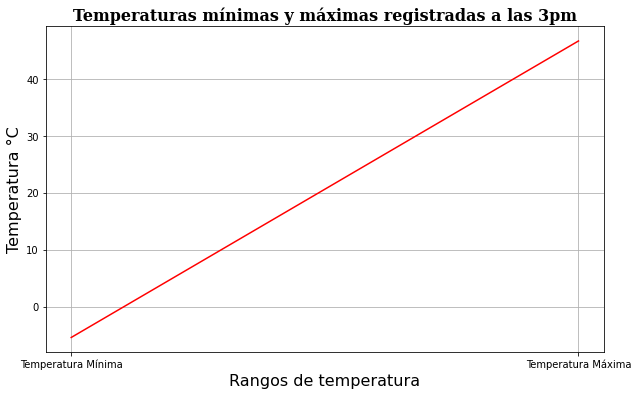

In [409]:
getGraficoLineas1(["Temperatura Mínima","Temperatura Máxima"],[t_min,t_max],"Rangos de temperatura","Temperatura °C","Temperaturas mínimas y máximas registradas a las 3pm")

In [414]:

# Comprobar el número de temperaturas registradas en cada tramo
df2['rango_temp_3pm'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')



,rango_temp_3pm
9,23263
8,22925
7,22530
6,16898
10,16739
11,12733
12,8787
5,8304
13,4178
14,2084



¿ Cuántos días ha precipitado según la característica RainToday?


In [350]:
# Contamos los días que llovió
# 1 Representa presencia en "YES".
total = df2.RainToday_Yes.count()

cant_dias_si = df2[(df2.RainToday_Yes == 1)]['RainToday_Yes'].count()
cant_dias_no = df2[(df2.RainToday_Yes == 0)]['RainToday_Yes'].count()
print("Según la característica RainToday, llovieron ", cant_dias_si, "días de los ",total,"registrados.")


Según la característica RainToday, llovieron  31455 días de los  142193 registrados.


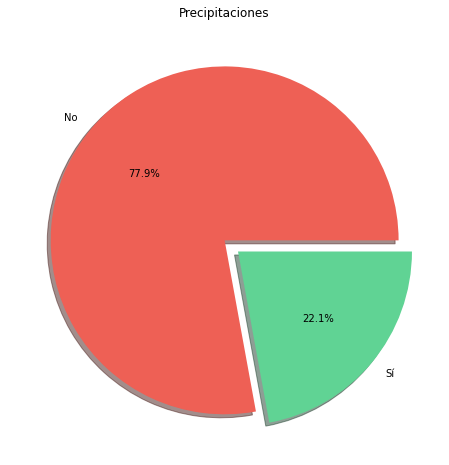

In [373]:
getGraficoPie1(df2,"RainToday_Yes",["No","Sí"],"Precipitaciones")


¿Cuántas observaciones poseen las siguientes localidades ?

- Portland
- NorfolkIsland
- Moree
- Albany
- Albury

In [163]:
# Función que permite contar las observaciones segúna la localidad
def cantidadObservaciones(location_encoder):
    return df2[(df2.Location_encoder == location_encoder)]['Location_encoder'].count()
'''
def getGraficoBarras(label_x,label_y,title, dataframe, feature_name):
    x_values = dataframe[(dataframe.Location == "Portland" && dataframe.Location == "Moree")]["Location"].unique()
    y_values = dataframe[(dataframe.Location == "Portland" && dataframe.Location == "Moree")]["Location"].value_count().tolist()
    plt.bar(x_values,y_values)
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()
'''

portland = cantidadObservaciones(33)
norfolkIsland = cantidadObservaciones(27)
moree = cantidadObservaciones(21)
albany = cantidadObservaciones(1)
albury = cantidadObservaciones(2)


print("========================================================================")
print(" OBSERVACIONES POR LOCALIDAD")
print("========================================================================")
print("La localidad de portland tiene un registro de", portland, "observaciones.")
print("La localidad de norfolkIsland tiene un registro de", norfolkIsland, "observaciones.")
print("La localidad de moree tiene un registro de", moree, "observaciones.")
print("La localidad de albany tiene un registro de", albany, "observaciones.")
print("La localidad de albury tiene un registro de", albury, "observaciones.")
print("========================================================================")


 OBSERVACIONES POR LOCALIDAD
La localidad de portland tiene un registro de 2996 observaciones.
La localidad de norfolkIsland tiene un registro de 2964 observaciones.
La localidad de moree tiene un registro de 2854 observaciones.
La localidad de albany tiene un registro de 3016 observaciones.
La localidad de albury tiene un registro de 3011 observaciones.


2996
2964
2854
3016
3011


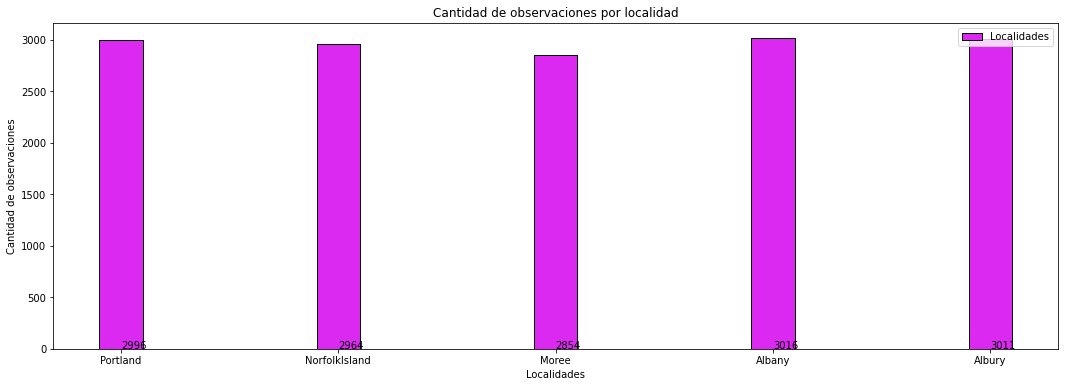

In [393]:
registros = ['Portland','NorfolkIsland','Moree','Albany','Albury']
listitaReg = []
for x in range(len(registros)):
    print(df3[(df3.Location == registros[x])]["Location"].count())
    listitaReg.append(df3[(df3.Location == registros[x])]["Location"].count())

getGraficoBarras1(registros, listitaReg,"Localidades","Cantidad de observaciones","Cantidad de observaciones por localidad","Localidades")

In [315]:
from openpyxl import Workbook # Permite exportar en archivos excel

# Exportamos nuestro archivo a csv
df2.to_csv('Cleaning_climate.csv')

# Exportamos nuestro archivo a excel
df2.to_excel('Cleaning_climate.xlsx')